<h1>XGBoost</h1>

## Importación de librerias



In [1]:

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Dataset

## Loading data

In [2]:
df_train = pd.read_parquet('../data/processed/df_train_reduced.parquet')
df_test= pd.read_parquet('../data/processed/df_test_reduced.parquet')
df_test_missing_10 = pd.read_parquet('../data/processed/df_test_reduced_missing_10.parquet')
df_test_missing_20 = pd.read_parquet('../data/processed/df_test_reduced_missing_20.parquet')
df_test_missing_30 = pd.read_parquet('../data/processed/df_test_reduced_missing_30.parquet')
df_test_missing_40 = pd.read_parquet('../data/processed/df_test_reduced_missing_40.parquet')

In [3]:
df_test_missing_10.head(10)

,10335183_chrXV_303214_G_T,10341838_chrXV_309869_T_C,10341923_chrXV_309954_G_A,10342190_chrXV_310221_T_C,10342543_chrXV_310574_A_G,10344120_chrXV_312151_C_T,10346156_chrXV_314187_C_G,10349298_chrXV_317329_C_T,3141305_chrV_249350_C_T,10383039_chrXV_351070_C_T,...,10640336_chrXV_608367_C_T,1428699_chrIV_68677_T_C,1428933_chrIV_68911_A_C,6970183_chrXI_391971_C_T,6970060_chrXI_391848_C_T,6969970_chrXI_391758_T_A,3698349_chrVI_229520_A_G,6969924_chrXI_391712_C_T,5535875_chrIX_143302_C_T,7948843_chrXII_703815_C_T
0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0
1,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2,2.0,2.0,NaN,2.0,NaN,NaN,2.0,2.0,1.0,2.0,...,2.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,2.0,1.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,NaN,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0
5,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0
6,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,...,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,2.0,1.0


In [4]:
df_train.head(10)

,10335183_chrXV_303214_G_T,10341838_chrXV_309869_T_C,10341923_chrXV_309954_G_A,10342190_chrXV_310221_T_C,10342543_chrXV_310574_A_G,10344120_chrXV_312151_C_T,10346156_chrXV_314187_C_G,10349298_chrXV_317329_C_T,3141305_chrV_249350_C_T,10383039_chrXV_351070_C_T,...,10640336_chrXV_608367_C_T,1428699_chrIV_68677_T_C,1428933_chrIV_68911_A_C,6970183_chrXI_391971_C_T,6970060_chrXI_391848_C_T,6969970_chrXI_391758_T_A,3698349_chrVI_229520_A_G,6969924_chrXI_391712_C_T,5535875_chrIX_143302_C_T,7948843_chrXII_703815_C_T
0,1,1,1,1,1,1,1,1,2,2,...,2,2,2,1,1,1,2,1,1,1
1,2,2,2,2,2,2,2,2,1,1,...,1,2,2,1,1,1,1,1,1,2
2,2,2,2,2,2,2,2,1,2,1,...,1,1,1,2,2,2,1,2,2,1
3,1,1,1,1,1,1,1,1,1,2,...,2,1,1,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,1,2,...,1,2,2,1,1,1,2,1,2,1
5,2,2,2,2,2,2,2,2,2,2,...,2,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,1,2,1,2
7,2,2,2,2,2,2,2,2,1,1,...,1,2,2,2,2,2,2,2,1,1
8,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,2,1
9,1,1,1,1,1,1,1,1,2,2,...,2,2,2,1,1,1,2,1,1,2


### Mostramos el numero de clases de entrenamieno y verificamos que están balanceadas

In [5]:
# Contar los valores de 0 y 1 en todo el DataFrame
total_counts = df_train.apply(pd.Series.value_counts).sum(axis=1)
print("Conteo total de clases en todo el DataFrame:")
print(total_counts)

Conteo total de clases en todo el DataFrame:
1    1756511
2    1756489
dtype: int64


## Modelo: XGBoost

Se define la función que se encarga de entrenar el modelo

In [13]:
from xgboost import XGBClassifier  

def train_model(df_train):
    X_train = df_train
    y_train = X_train.values-1  # las clases son [1, 2], ahora serán [0, 1]

    # Entrenar un XGBClassifier
    xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    )
    xgb_model.fit(X_train, y_train)  # Entrenamos el modelo usando los valores no faltantes
    return xgb_model


### Test 

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

def predict_missing_values_for_row(row, model, known_features, missing_features):
    # Asegurarse de que la fila tenga los nombres de las columnas correctos
    X_known = row[known_features].values.reshape(1, -1)

    # Crear un dataframe vacío con las columnas del modelo y rellenar con ceros (o cualquier valor temporal)
    X_full = pd.DataFrame(np.zeros((1, model.n_features_in_)), columns=model.feature_names_in_)
    
    # Rellenar las características conocidas en sus correspondientes columnas
    X_full.loc[:, known_features] = X_known

    # Hacer la predicción usando el modelo entrenado y volver a las clases originales [1, 2]
    pred = model.predict(X_full)[0] + 1  # Sumar 1 para regresar a [1, 2]

    return pred, missing_features

# Imputar valores faltantes y calcular métricas
def impute_and_evaluate(df_test_missing, df_test_original, model):
    df_test_imputed = df_test_missing.copy()  # Mantener el dataframe con su estructura

    all_y_true = []
    all_y_pred = []

    # Iterar sobre cada fila del dataset
    for index, row in df_test_missing.iterrows():
        if row.isna().any():  # Solo imputar filas con valores faltantes
            known_features = row.dropna().index  # Características conocidas (no NaN)
            missing_features = row.index[row.isna()]  # Características con NaN

            # Si hay suficientes características conocidas, predecir los NaN
            if len(known_features) > 0:
                pred, missing_features = predict_missing_values_for_row(
                    row, model, known_features, missing_features
                )

                # Imputar los valores predichos en el dataset
                df_test_imputed.loc[index, missing_features] = pred[:len(missing_features)]

                # Guardar los valores verdaderos y predichos para evaluación
                y_true = df_test_original.loc[index, missing_features]
                all_y_true.extend(y_true)
                all_y_pred.extend(pred[:len(missing_features)])  # No sumamos aquí

    # Calcular las métricas de evaluación
    accuracy_general = accuracy_score(all_y_true, all_y_pred)
    f1_macro = f1_score(all_y_true, all_y_pred, average='macro')
    precision_macro = precision_score(all_y_true, all_y_pred, average='macro')
    recall_macro = recall_score(all_y_true, all_y_pred, average='macro')

    return df_test_imputed, accuracy_general, f1_macro, precision_macro, recall_macro

# Función para procesar diferentes niveles de missingness
def process_multiple_missingness_levels(df_train, df_test, missingness_levels, model):
    results = {
        "accuracy": [],
        "f1": [],
        "precision": [],
        "recall": []
    }

    for level in missingness_levels:
        df_test_missing = globals()[f'df_test_missing_{level}']  # Conjunto de test con missingness
        
        # Imputar los valores faltantes
        df_test_imputed, accuracy, f1, precision, recall = impute_and_evaluate(
            df_test_missing, df_test, model
        )

        # Guardar las métricas
        results["accuracy"].append(accuracy)
        results["f1"].append(f1)
        results["precision"].append(precision)
        results["recall"].append(recall)
        
        # Guardar el conjunto imputado como una variable global
        globals()[f'df_test_missing_{level}_imputed'] = df_test_imputed

    return results

# Función para graficar los resultados
def plot_multiple_metrics(missingness_levels, metrics_dict):
    plt.figure(figsize=(10, 6))
    
    for metric_name, metric_values in metrics_dict.items():
        plt.plot(missingness_levels, metric_values, marker='o', label=f'{metric_name}')
    
    plt.xlabel('Porcentaje de valores faltantes')
    plt.ylabel('Métrica')
    plt.title('Comparación de métricas vs Porcentaje de valores faltantes')
    plt.grid(True)
    plt.legend()
    plt.show()


def detailed_metrics_report(missingness_levels, metrics_dict):
    # Reportar métricas numéricas
    print("==== Reporte Detallado de Métricas ====\n")
    for metric_name, metric_values in metrics_dict.items():
        print(f"Métricas para {metric_name}:")
        for i, level in enumerate(missingness_levels):
            print(f"- Porcentaje de valores faltantes {level}%: {metric_values[i]:.4f}")
        print("\n")
    


In [15]:
xgb_model = train_model(df_train)  # Aquí entrenamos el modelo una sola vez


In [22]:
# Llamar al proceso con el modelo ya entrenado
missingness_levels = [10, 20, 30, 40]
metrics_results = process_multiple_missingness_levels(df_train, df_test, missingness_levels, xgb_model)

In [23]:
detailed_metrics_report(missingness_levels, metrics_results)

==== Reporte Detallado de Métricas ====

Métricas para accuracy:
- Porcentaje de valores faltantes 10%: 0.5291
- Porcentaje de valores faltantes 20%: 0.5250
- Porcentaje de valores faltantes 30%: 0.5176
- Porcentaje de valores faltantes 40%: 0.5118


Métricas para f1:
- Porcentaje de valores faltantes 10%: 0.5280
- Porcentaje de valores faltantes 20%: 0.5203
- Porcentaje de valores faltantes 30%: 0.5066
- Porcentaje de valores faltantes 40%: 0.4916


Métricas para precision:
- Porcentaje de valores faltantes 10%: 0.5291
- Porcentaje de valores faltantes 20%: 0.5262
- Porcentaje de valores faltantes 30%: 0.5194
- Porcentaje de valores faltantes 40%: 0.5146


Métricas para recall:
- Porcentaje de valores faltantes 10%: 0.5289
- Porcentaje de valores faltantes 20%: 0.5252
- Porcentaje de valores faltantes 30%: 0.5177
- Porcentaje de valores faltantes 40%: 0.5122




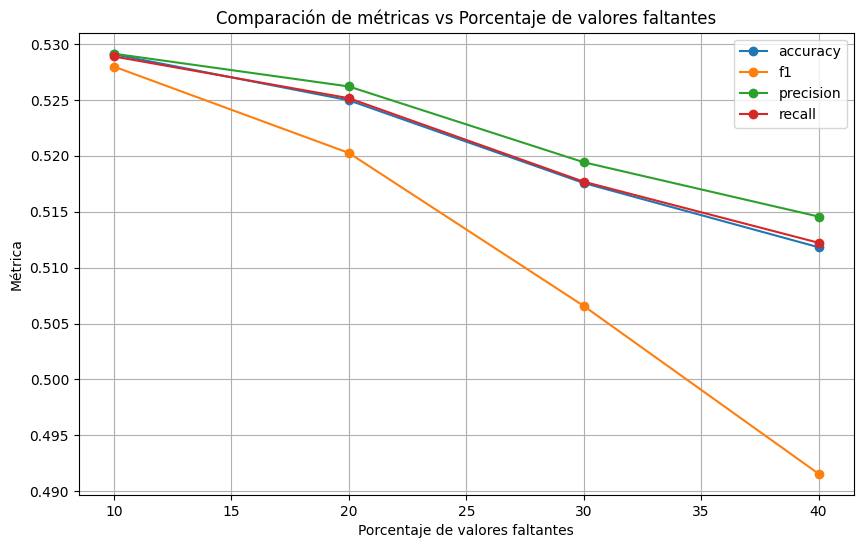

In [24]:
# Graficar resultados
plot_multiple_metrics(missingness_levels, metrics_results)

### Guardar datasets imputados a partir de los distintos datasets con diferentes porcentajes de missingness y modelo generado

In [25]:
import os
import h5py
import pickle
import numpy as np

def save_model(rf_model, model_path):
    os.makedirs(os.path.dirname(model_path), exist_ok=True)  # Crear directorios si no existen
    
    # Serializamos el modelo con pickle en un buffer de bytes
    model_bytes = pickle.dumps(rf_model)
    
    # Convertir el buffer a un array NumPy para que HDF5 lo maneje correctamente
    model_array = np.frombuffer(model_bytes, dtype='uint8')
    
    # Guardar el modelo en un archivo HDF5 con compresión GZIP
    with h5py.File(model_path, 'w') as f:
        # Dividimos el array en chunks y aplicamos compresión
        f.create_dataset('random_forest_model', data=model_array, compression="gzip", compression_opts=9)
    
    print(f"Modelo guardado y comprimido en {model_path}")


# Función para guardar los datasets imputados
def save_imputed_datasets(df_imputed, level, output_dir):
    os.makedirs(output_dir, exist_ok=True)  # Crear directorios si no existen
    file_path = os.path.join(output_dir, f'df_test_missing_{level}_imputed.parquet')
    df_imputed.to_csv(file_path, index=False)
    print(f"Dataset imputado guardado en {file_path}")


In [26]:


# Guardar el modelo
model_output_path = "../models/XGBoost/XGBoost_model.h5"
save_model(xgb_model, model_output_path)

# Guardar los datasets imputados
for level in missingness_levels:
    df_test_imputed = globals()[f'df_test_missing_{level}_imputed']
    data_output_dir = "../data/generated/xgboost"
    save_imputed_datasets(df_test_imputed, level, data_output_dir)


Modelo guardado y comprimido en ../models/XGBoost/XGBoost_model.h5
Dataset imputado guardado en ../data/generated/xgboost/df_test_missing_10_imputed.parquet
Dataset imputado guardado en ../data/generated/xgboost/df_test_missing_20_imputed.parquet
Dataset imputado guardado en ../data/generated/xgboost/df_test_missing_30_imputed.parquet
Dataset imputado guardado en ../data/generated/xgboost/df_test_missing_40_imputed.parquet


Así se cargaría el modelo de ser necesario desde HDF5:
with h5py.File(model_output_path, 'r') as f:
    model_bytes = f['xgboost_model'][()]
    f_model_loaded = joblib.loads(model_bytes)
    